In [20]:
import seaborn as sns
sns.set()
import pandas as pd
import csv
import os
import argparse
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [91]:
def createData(Opts=['SGD_C','SGD','SGDM','Adam'], model='LR'): 
    seeds = ['100','101','102','103','104']
    lr = ['0.0001']#,'0.001','0.01']
    topC = ['3']#,'10','20','50']
    decay = ['0.99']#,'0.95','0.9']
    choice = ['sum']#,'average']
    fieldnames=['Model','Optimizer','Seed','Epoch','topC', 'LearningRate', 'decay', 'choice','TrainLoss','Val.Loss','Val.Accuracy']
    target = open("results_valid.csv", "w")
    writer = csv.DictWriter(target, fieldnames=fieldnames)
    writer.writerow(dict(zip(fieldnames, fieldnames)))
    for v in Opts:
        for s,l,t,dec,ch in itertools.product(seeds,lr,topC,decay,choice):
            if '_C' not in v:
               folder = os.path.join('..','Results','mnist', model +'_'+ v, 'Model','seed_'+s+'_LR_'+l)#+'_topC_'+c+'_kappa_'+k)
            else:
                folder = os.path.join('..','Results','mnist', model+'_' + v, 'Model','seed_'+s+'_LR_'+l+'_topC_'+t+'_decay_'+dec+'_'+ch)
            f = open(os.path.join(folder,'logs.txt'))
            ep = 1
            for line in f:
                line = line.split('|')
                if line !=['\n']:
                    writer.writerow(dict([
                    ('Model',model),
                    ('Optimizer',v),#+' '+l),
                    ('LearningRate',l),
                    ('decay',dec),
                    ('topC',t),
                    ('choice',ch),
                    ('Seed',s),
                    ('Epoch',ep),
                    ('TrainLoss',line[2].split()[-1]),
                    ('Val.Loss',line[3].split()[-1]),
                    ('Val.Accuracy',line[4].split()[-1])])
                    )

                    ep+=1
    target.close()
    return fieldnames

In [94]:
def createGraph(yrange=[0.0,0.5], model = 'model',filename = 'results_valid.csv', graphparam = 'METEOR', save_file = 'test',opt = None):
    #plt.ylim(yrange[0],yrange[1])
    if 'oss' not in graphparam:
        plt.ylim(80,94)
    else:
        plt.ylim(0,0.5)
    sns.lineplot(x = 'Epoch', y = graphparam,hue='Optimizer', style = 'Optimizer',data = pd.read_csv(filename))
    if opt != None:
        plt.title('Perf. of '+model+' on MNIST dataset with Optimizer as ' + opt[0])
    else:
        plt.title('Perf. of '+model+' on MNIST dataset')
    plt.show()
    plt.close()

TrainLoss


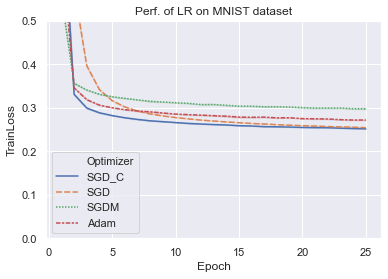

Val.Loss


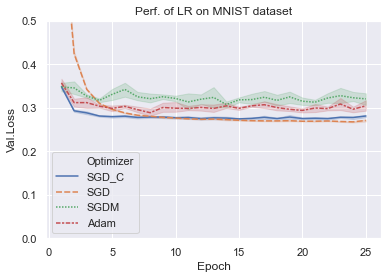

Val.Accuracy


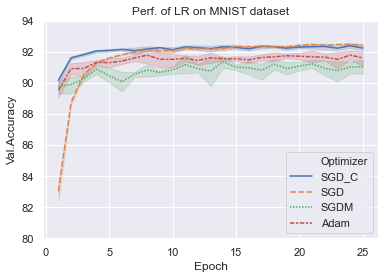

In [95]:
header = createData()
#vary topC =3
#vary LR = 0.0001
#vary decay = 0.99
#choice =
for param in header[-3:]:
    print(param)
    createGraph(model='LR',graphparam=param)

0       0.0001
1       0.0001
2       0.0001
3       0.0001
4       0.0001
         ...  
8995    0.0100
8996    0.0100
8997    0.0100
8998    0.0100
8999    0.0100
Name: Learning rate, Length: 9000, dtype: float64